In [2]:
!pip install comet_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.6/601.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.8/257.8 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.7/514.7 kB 24.2 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.7.0
    Uninstalling websocket-client-1.7.0:
      Successfully uninstalled websocket-client-1.7.0
  Attempting uninstall: python-box
    Found existing installation: python-box 7.1.1
    Uninstalling python-box-7.1.1:
      Successfully uninstalled python-box-7.1.1


In [3]:
# импортируем библиотеки
import pandas as pd
import seaborn as sns
from comet_ml import Experiment
from matplotlib import pyplot as plt

In [4]:
# создаем эксперимент на comet.ml
experiment = Experiment(
    api_key="eunXyOkMIOmgXb6nQRN3xEEhj",
    project_name="medical-appointment",
    workspace="vadimkopytko",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/vadimkopytko/medical-appointment/ce6022c6bb26486487ed1c6cd4b39d0b



In [5]:
# загружаем данные из csv файла
df = pd.read_csv('KaggleV2-May-2016.csv')

In [6]:
# посомтрим на датасет
display(df)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107915,6.216262e+11,5772620,F,2016-06-03T15:51:09Z,2016-06-06T00:00:00Z,44.0,ILHA DE SANTA MARIA,0.0,0.0,0.0,0.0,0.0,0.0,No
107916,3.738988e+13,5670994,M,2016-05-06T15:11:37Z,2016-06-06T00:00:00Z,58.0,MONTE BELO,0.0,0.0,0.0,0.0,0.0,1.0,No
107917,7.243677e+10,5621198,M,2016-04-26T09:58:28Z,2016-06-06T00:00:00Z,75.0,ILHA DE SANTA MARIA,0.0,0.0,0.0,0.0,0.0,1.0,No
107918,2.245567e+14,5538388,M,2016-04-01T11:57:10Z,2016-06-03T00:00:00Z,5.0,RESISTÊNCIA,0.0,0.0,0.0,0.0,0.0,1.0,Yes


In [7]:
# посомтрим на статистические характеристики столбцов и выберем 7 столбцов с числовым данными
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.079200e+05,1.079200e+05,107919.000000,107919.000000,107919.000000,107919.000000,107919.000000,107919.000000,107919.000000
mean,1.471753e+14,5.673693e+06,37.062297,0.098861,0.197630,0.072239,0.029374,0.022211,0.318943
std,2.556319e+14,7.088832e+04,23.138203,0.298477,0.398213,0.258885,0.168853,0.161414,0.466069
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175435e+12,5.639644e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.166738e+13,5.679193e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.437323e+13,5.722460e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


В итоге нам потребуются столбцы Age, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received. Отбрасываем id пациента и клиники.

{'web': 'https://www.comet.com/api/image/download?imageId=e1d6f884d74a4e2cad6a3bf069b527b0&experimentKey=ce6022c6bb26486487ed1c6cd4b39d0b',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=e1d6f884d74a4e2cad6a3bf069b527b0&experimentKey=ce6022c6bb26486487ed1c6cd4b39d0b',
 'imageId': 'e1d6f884d74a4e2cad6a3bf069b527b0'}

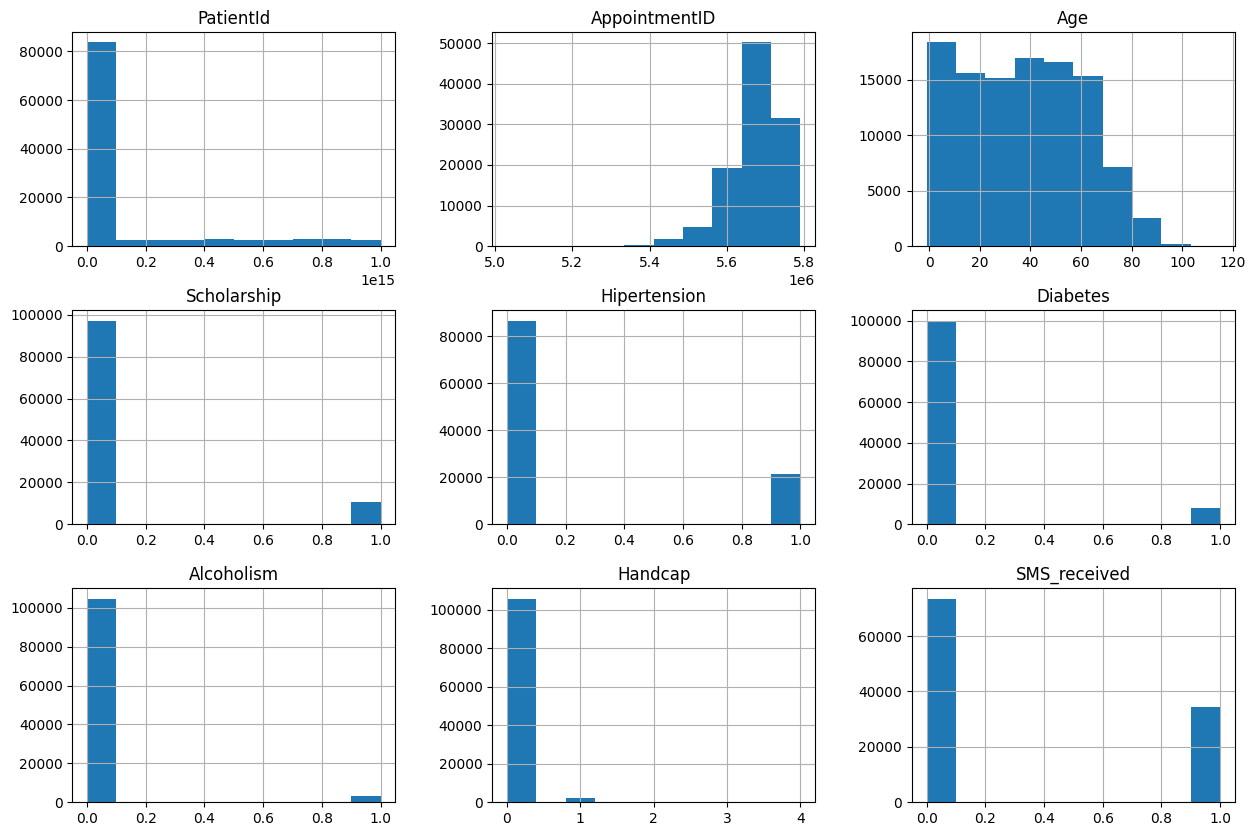

In [8]:
df.hist(figsize=(15, 10))
experiment.log_figure(figure=plt)

In [9]:
# оставляем только числовые значения
df_main = df.drop([ 'PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood','No-show'], axis=1)

In [10]:
# посмотрим на получившийся датасет
display(df_main)

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,62.0,0.0,1.0,0.0,0.0,0.0,0.0
1,56.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.0,0.0,0.0,0.0,0.0,0.0,0.0
4,56.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
107915,44.0,0.0,0.0,0.0,0.0,0.0,0.0
107916,58.0,0.0,0.0,0.0,0.0,0.0,1.0
107917,75.0,0.0,0.0,0.0,0.0,0.0,1.0
107918,5.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
# посмотрим на матрицу корреляции между признаками
df.corr().round(2)

<ipython-input-11-6d2950b3a1bf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(2)


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.00,0.00,-0.00,-0.00,-0.01,0.00,0.01,-0.01,-0.01
AppointmentID,0.00,1.00,-0.02,0.02,0.01,0.02,0.03,0.01,-0.26
Age,-0.00,-0.02,1.00,-0.09,0.51,0.29,0.09,0.08,0.01
Scholarship,-0.00,0.02,-0.09,1.00,-0.02,-0.02,0.04,-0.01,0.00
Hipertension,-0.01,0.01,0.51,-0.02,1.00,0.43,0.09,0.08,-0.01
Diabetes,0.00,0.02,0.29,-0.02,0.43,1.00,0.02,0.06,-0.01
Alcoholism,0.01,0.03,0.09,0.04,0.09,0.02,1.00,0.01,-0.02
Handcap,-0.01,0.01,0.08,-0.01,0.08,0.06,0.01,1.00,-0.02
SMS_received,-0.01,-0.26,0.01,0.00,-0.01,-0.01,-0.02,-0.02,1.00


<ipython-input-14-fa0b463ee106>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), annot=True, linewidths=1, fmt='.2f', cmap='coolwarm')


{'web': 'https://www.comet.com/api/image/download?imageId=553752fab0c7453085f4c933c4ad40ee&experimentKey=ce6022c6bb26486487ed1c6cd4b39d0b',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=553752fab0c7453085f4c933c4ad40ee&experimentKey=ce6022c6bb26486487ed1c6cd4b39d0b',
 'imageId': '553752fab0c7453085f4c933c4ad40ee'}

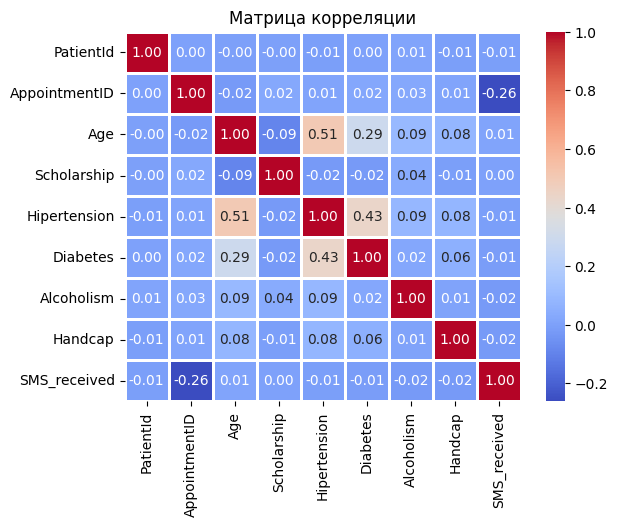

In [14]:
# создадим график темпловой карты матрицы корреляции изалогируем его
heatmap = sns.heatmap(df.corr(), annot=True, linewidths=1, fmt='.2f', cmap='coolwarm')
heatmap.set_title('Матрица корреляции')
experiment.log_figure(figure=plt)